## El Juego del Calamar

En el quinto juego planteado en la serie del Juego del Calamar los jugadores tienen que atravesar un puente de cristal con un total de 18 peldaños. En cada uno de ellos hay dos cristales: uno de cristal templado (capaz de soportar el peso de dos jugadores) y uno de cristal normal (que se rompe con simplemente pisarlo). Si un jugador pisa un cristal normal éste se rompe y el jugador queda eliminado (lo que en la serie significa muerto)

En la serie un total de 16 jugadores llegan a esta prueba y tienen que atravesar el puente en un orden determinado de antemano (lo escogen los mismos jugadores, aunque no saben para qué es).

En la primera simulación tomaremos como valores

jugadores = 16
peldaños = 18
probabilidad de elegir el cristal templado = 0,5

Para la simulación, en principio tomaremos 100.000 repeticiones.

Método:
Para cada paseo se genera un valor de una uniforme (0,1). Si el resultado es inferior a la probabilidad (en nuestro caso p=0,5) consideramos que los jugadores han acertado. En caso contrario han fallado.

El número de supervivientes se calculará como el total de jugadores (en nuestro caso 18) menos el número de fallos.

In [1]:
# Probabilidad de acierto
p = 0.5

# Número de peldaños
peldaños <- 18

# Jugadores
jugadores <- 16

# Número de muestras
muestras <- 100000

supervivientes_m <- c(1:muestras)


for (i in 1:muestras)
{
paseo <- runif(n = 18, min = 0, max = 1)
paseo2 <- (paseo <= p)
# paseo
# paseo2
aciertos <- sum(paseo2)
fallos <- peldaños - aciertos
supervivientes <- jugadores - fallos
if (supervivientes<0)
{
  supervivientes <- 0
}
  supervivientes_m[i]<-supervivientes
}






Número medio de supervivientes:

In [2]:
mean(supervivientes_m)

[1] 7.0127

Histograma del número de supervivientes

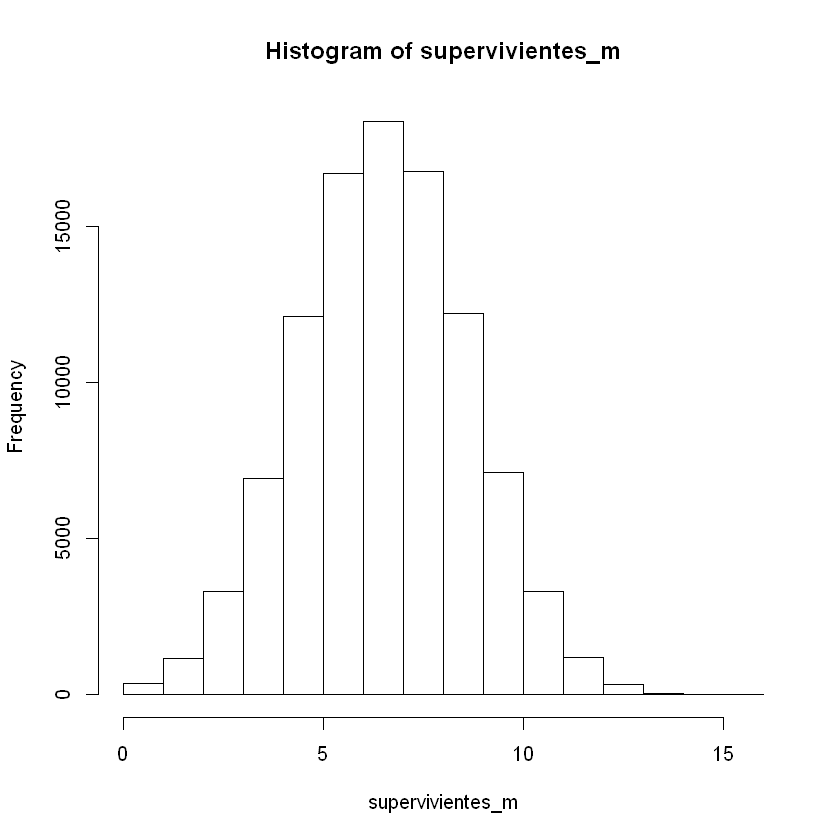

In [3]:
hist(supervivientes_m)

Tablas de frecuencias:

In [4]:
tabla <- table(supervivientes_m)
tabla_f <- prop.table(tabla)

knitr::kable(
  tabla,
  caption = "Frecuencias absolutas"
)

knitr::kable(
  tabla_f,
  caption = "Frecuencias relativas"
)



Table: Frecuencias absolutas

|supervivientes_m |  Freq|
|:----------------|-----:|
|0                |    74|
|1                |   299|
|2                |  1175|
|3                |  3309|
|4                |  6918|
|5                | 12115|
|6                | 16696|
|7                | 18381|
|8                | 16762|
|9                | 12211|
|10               |  7137|
|11               |  3317|
|12               |  1203|
|13               |   339|
|14               |    52|
|15               |    11|
|16               |     1|



Table: Frecuencias relativas

|supervivientes_m |    Freq|
|:----------------|-------:|
|0                | 0.00074|
|1                | 0.00299|
|2                | 0.01175|
|3                | 0.03309|
|4                | 0.06918|
|5                | 0.12115|
|6                | 0.16696|
|7                | 0.18381|
|8                | 0.16762|
|9                | 0.12211|
|10               | 0.07137|
|11               | 0.03317|
|12               | 0.01203|
|13               | 0.00339|
|14               | 0.00052|
|15               | 0.00011|
|16               | 0.00001|

Porcentaje de resultados con 3 o menos supervivientes

In [5]:
tablamenor3 <- table(supervivientes_m, exclude=c(4,5,6,7,8,9,10,11,12,13,14,15,16))
menor3 <- sum(tablamenor3) 
total <- sum(tabla)
100*menor3/total

[1] 4.857

Según la simulación el número medio de superviventes está alrededor de 7 y el porcentaje de ocasiones en las que sobreviven 3 o menos jugadores es menor del 5%. Por lo tanto podríamos decir que el resultado que se produce en la serie (3 supervivientes) es muy poco probable e inferior al esperado.

Esta misma simulación podríamos haberla realizado utilizando la distribución binomial para calcular el número de éxitos en cada paseo directamente en lugar de generar los valores individuales para cada paso.